In [1]:
# -----------------------------
# Question 1 - Tesla Stock Data
# -----------------------------
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

# Create Tesla ticker object
tesla = yf.Ticker("TSLA")

# Get historical stock data
tesla_data = tesla.history(period="max")

# Reset index
tesla_data.reset_index(inplace=True)

# Display first 5 rows
print("Tesla Stock Data (head):")
print(tesla_data.head())

Tesla Stock Data (head):
                       Date      Open      High       Low     Close  \
0 2010-06-29 00:00:00-04:00  1.266667  1.666667  1.169333  1.592667   
1 2010-06-30 00:00:00-04:00  1.719333  2.028000  1.553333  1.588667   
2 2010-07-01 00:00:00-04:00  1.666667  1.728000  1.351333  1.464000   
3 2010-07-02 00:00:00-04:00  1.533333  1.540000  1.247333  1.280000   
4 2010-07-06 00:00:00-04:00  1.333333  1.333333  1.055333  1.074000   

      Volume  Dividends  Stock Splits  
0  281494500        0.0           0.0  
1  257806500        0.0           0.0  
2  123282000        0.0           0.0  
3   77097000        0.0           0.0  
4  103003500        0.0           0.0  


In [3]:
# ---------------------------------------
# Question 2 - Tesla Revenue Webscraping
# ---------------------------------------

# Download the webpage
url_tesla = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"
html_data = requests.get(url_tesla).text

# Parse HTML with BeautifulSoup
soup = BeautifulSoup(html_data, "html.parser")

# Extract all tables
tables = pd.read_html(html_data)

# Tesla revenue is usually the second table
tesla_revenue = tables[1]

# Clean column names
tesla_revenue.columns = ["Date", "Revenue"]

# Drop NaN and clean Revenue column
tesla_revenue.dropna(inplace=True)
tesla_revenue["Revenue"] = tesla_revenue["Revenue"].str.replace(r"[\$,]", "", regex=True)
tesla_revenue = tesla_revenue[tesla_revenue["Revenue"] != ""]

print("Tesla Revenue Data (tail):")
print(tesla_revenue.tail())

Tesla Revenue Data (tail):
          Date Revenue
48  2010-09-30      31
49  2010-06-30      28
50  2010-03-31      21
52  2009-09-30      46
53  2009-06-30      27


/tmp/ipython-input-3693500865.py:13: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  tables = pd.read_html(html_data)


In [4]:
# -------------------------------
# Question 3 - GameStop Stock Data
# -------------------------------

# Create GameStop ticker object
gme = yf.Ticker("GME")

# Get historical stock data
gme_data = gme.history(period="max")

# Reset index
gme_data.reset_index(inplace=True)

# Display first 5 rows
print("GameStop Stock Data (head):")
print(gme_data.head())


GameStop Stock Data (head):
                       Date      Open      High       Low     Close    Volume  \
0 2002-02-13 00:00:00-05:00  1.620128  1.693350  1.603296  1.691666  76216000   
1 2002-02-14 00:00:00-05:00  1.712708  1.716074  1.670626  1.683251  11021600   
2 2002-02-15 00:00:00-05:00  1.683251  1.687459  1.658002  1.674834   8389600   
3 2002-02-19 00:00:00-05:00  1.666418  1.666418  1.578047  1.607504   7410400   
4 2002-02-20 00:00:00-05:00  1.615921  1.662210  1.603296  1.662210   6892800   

   Dividends  Stock Splits  
0        0.0           0.0  
1        0.0           0.0  
2        0.0           0.0  
3        0.0           0.0  
4        0.0           0.0  


In [21]:
# ----------------------------------------
# Question 4 - GameStop Revenue Webscraping
# ----------------------------------------
import requests
import pandas as pd
from io import StringIO

url_gme = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"
html_data_gme = requests.get(url_gme).text

# Extract all tables (use StringIO to avoid FutureWarning)
tables_gme = pd.read_html(StringIO(html_data_gme))

# Pick the correct GameStop revenue table (Table 1)
gme_revenue = tables_gme[1]

# Rename columns
gme_revenue.columns = ["Date", "Revenue"]

# Clean data
gme_revenue.dropna(inplace=True)
gme_revenue["Revenue"] = gme_revenue["Revenue"].str.replace(r"[\$,]", "", regex=True)
gme_revenue = gme_revenue[gme_revenue["Revenue"] != ""]

print("GameStop Revenue Data (tail):")
print(gme_revenue.tail())

GameStop Revenue Data (tail):
          Date Revenue
48  2010-09-30      31
49  2010-06-30      28
50  2010-03-31      21
52  2009-09-30      46
53  2009-06-30      27


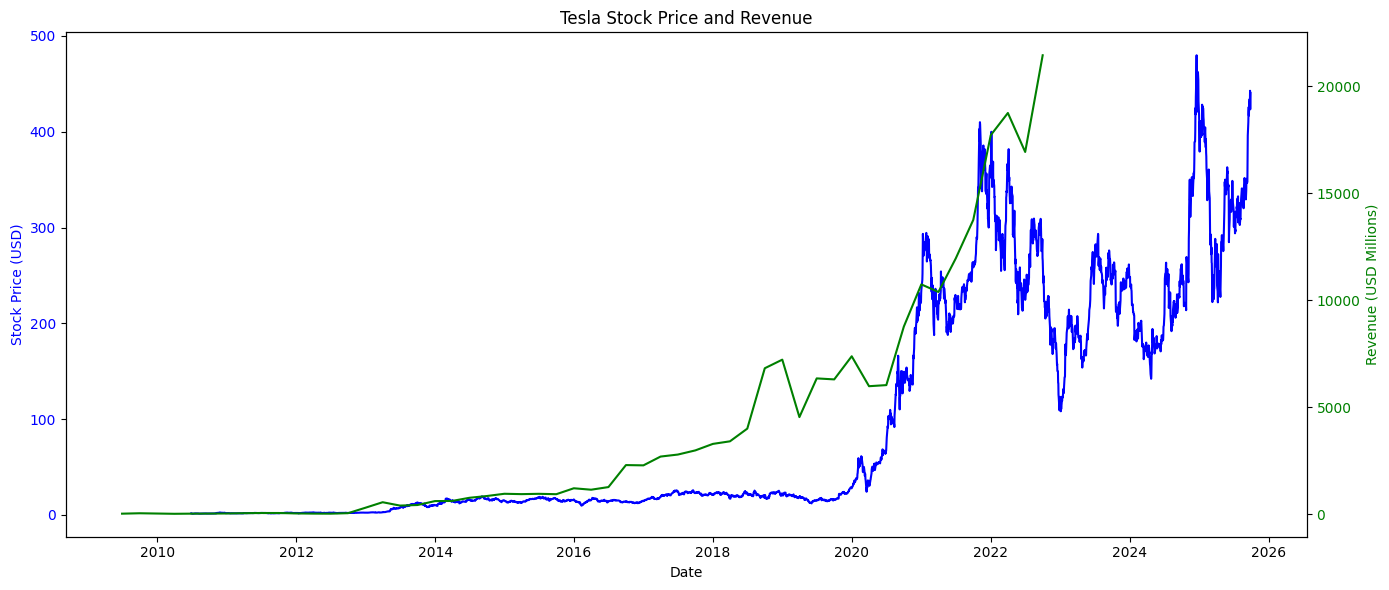

In [9]:
# -------------------------------
# Question 5 - Tesla Dashboard
# -------------------------------

def make_graph(stock_data, revenue_data, title):
    # Ensure Date columns are datetime
    stock_data = stock_data.copy()
    revenue_data = revenue_data.copy()

    stock_data["Date"] = pd.to_datetime(stock_data["Date"], errors="coerce")
    revenue_data["Date"] = pd.to_datetime(revenue_data["Date"], errors="coerce")

    # Drop rows with invalid dates
    stock_data.dropna(subset=["Date"], inplace=True)
    revenue_data.dropna(subset=["Date"], inplace=True)

    # Convert Revenue to numeric
    revenue_data["Revenue"] = pd.to_numeric(revenue_data["Revenue"], errors="coerce")
    revenue_data.dropna(subset=["Revenue"], inplace=True)

    # Plot
    fig, ax1 = plt.subplots(figsize=(14, 6))

    ax1.plot(stock_data["Date"], stock_data["Close"], color="blue", label="Stock Price")
    ax1.set_xlabel("Date")
    ax1.set_ylabel("Stock Price (USD)", color="blue")
    ax1.tick_params(axis="y", labelcolor="blue")

    ax2 = ax1.twinx()
    ax2.plot(revenue_data["Date"], revenue_data["Revenue"], color="green", label="Revenue")
    ax2.set_ylabel("Revenue (USD Millions)", color="green")
    ax2.tick_params(axis="y", labelcolor="green")

    plt.title(title)
    fig.tight_layout()
    plt.show()

# ✅ Now just call it directly
make_graph(tesla_data, tesla_revenue, "Tesla Stock Price and Revenue")


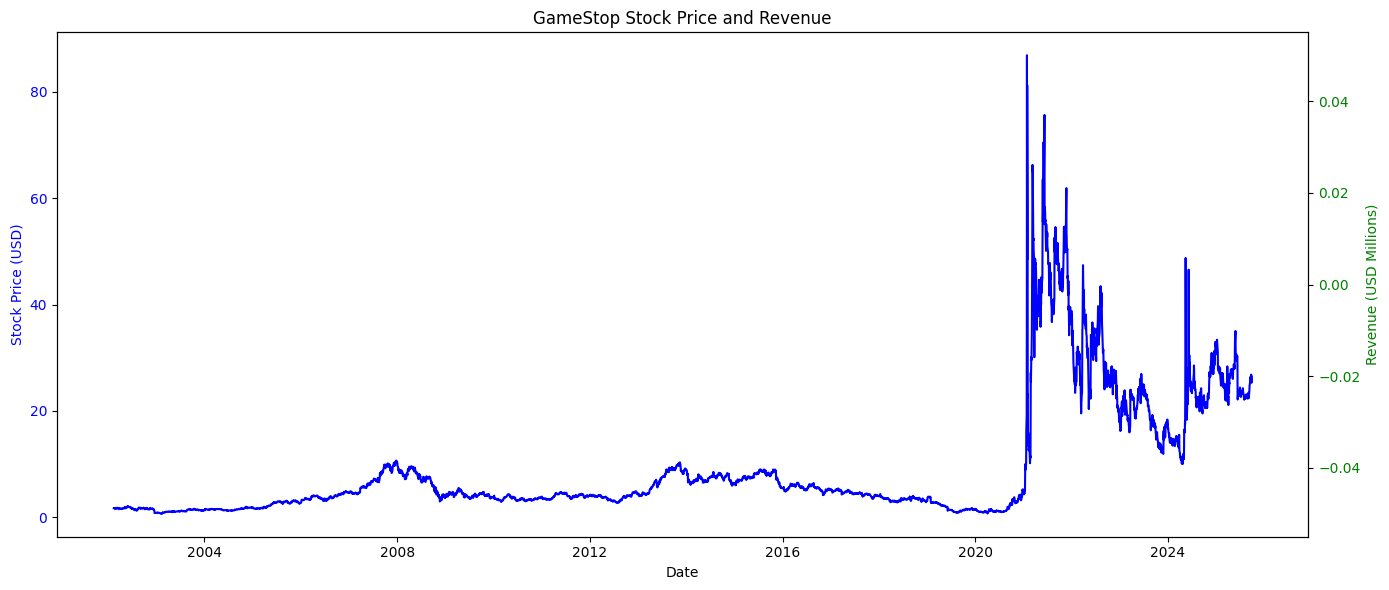

In [10]:
# -------------------------------
# Question 6 - GameStop Dashboard
# -------------------------------
make_graph(gme_data, gme_revenue, "GameStop Stock Price and Revenue")
